# Lab 2, № Группы, ФИО

## Цель лабораторной работы
Цель лабораторной работы — познакомиться с методом кластеризации K-Means с помощью пакета `sklearn`. Для этого будет использован набор данных из предыдущей лабораторной работы.

## 1. Подготовка данных

### 1.1. Загрузка данных



In [5]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('AI_index_db.csv')

In [6]:
# Добавление нового атрибута: нормализованный общий индекс
data['Normalized Total Score'] = (data['Total score'] - data['Total score'].min()) / (data['Total score'].max() - data['Total score'].min())


In [7]:
# Определение выбросов по IQR
Q1 = data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].quantile(0.25)
Q3 = data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов
data_cleaned = data[~((data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']] < (Q1 - 1.5 * IQR)) | (data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [8]:
# Удаление дубликатов
data_cleaned = data_cleaned.drop_duplicates()

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Выбор числовых атрибутов для кластеризации
features = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']
X = data_cleaned[features]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение K-Means
kmeans = KMeans(n_clusters=3, random_state=0) 
data_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

# Просмотр первых строк с метками кластеров
print(data_cleaned.head())

            Country  Talent  Infrastructure  Operating Environment  Research  \
7   The Netherlands   33.83           81.99                  88.05     25.54   
8           Germany   27.63           77.22                  70.22     35.84   
9            France   28.32           77.15                  80.02     25.48   
10        Australia   25.43           63.43                  61.23     32.63   
11          Ireland   29.93           89.50                  70.15     16.79   

    Development  Government Strategy  Commercial  Total score        Region  \
7         30.17                62.35        4.97        36.35        Europe   
8         24.79                84.65        8.29        36.04        Europe   
9         21.44                91.20        7.65        34.42        Europe   
10        41.15                82.11        6.72        33.86  Asia-Pacific   
11        30.85                69.44        3.94        33.04        Europe   

    Cluster Income group   Political regime 

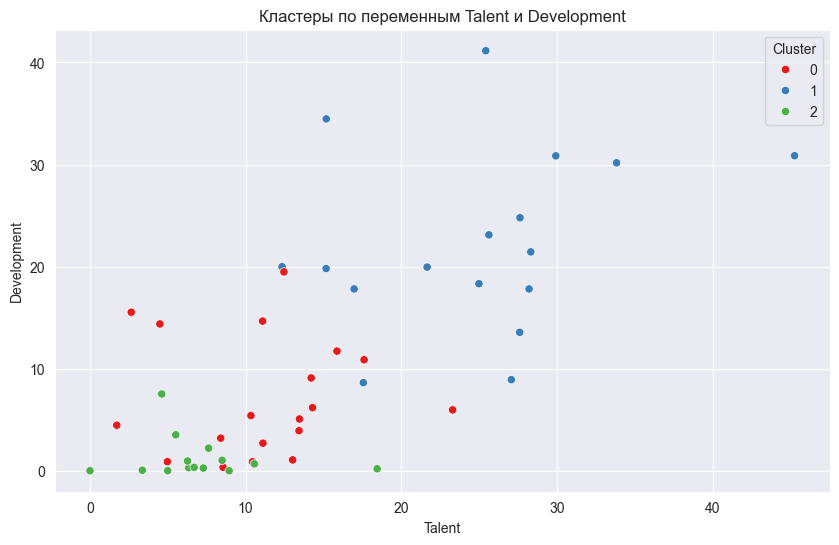

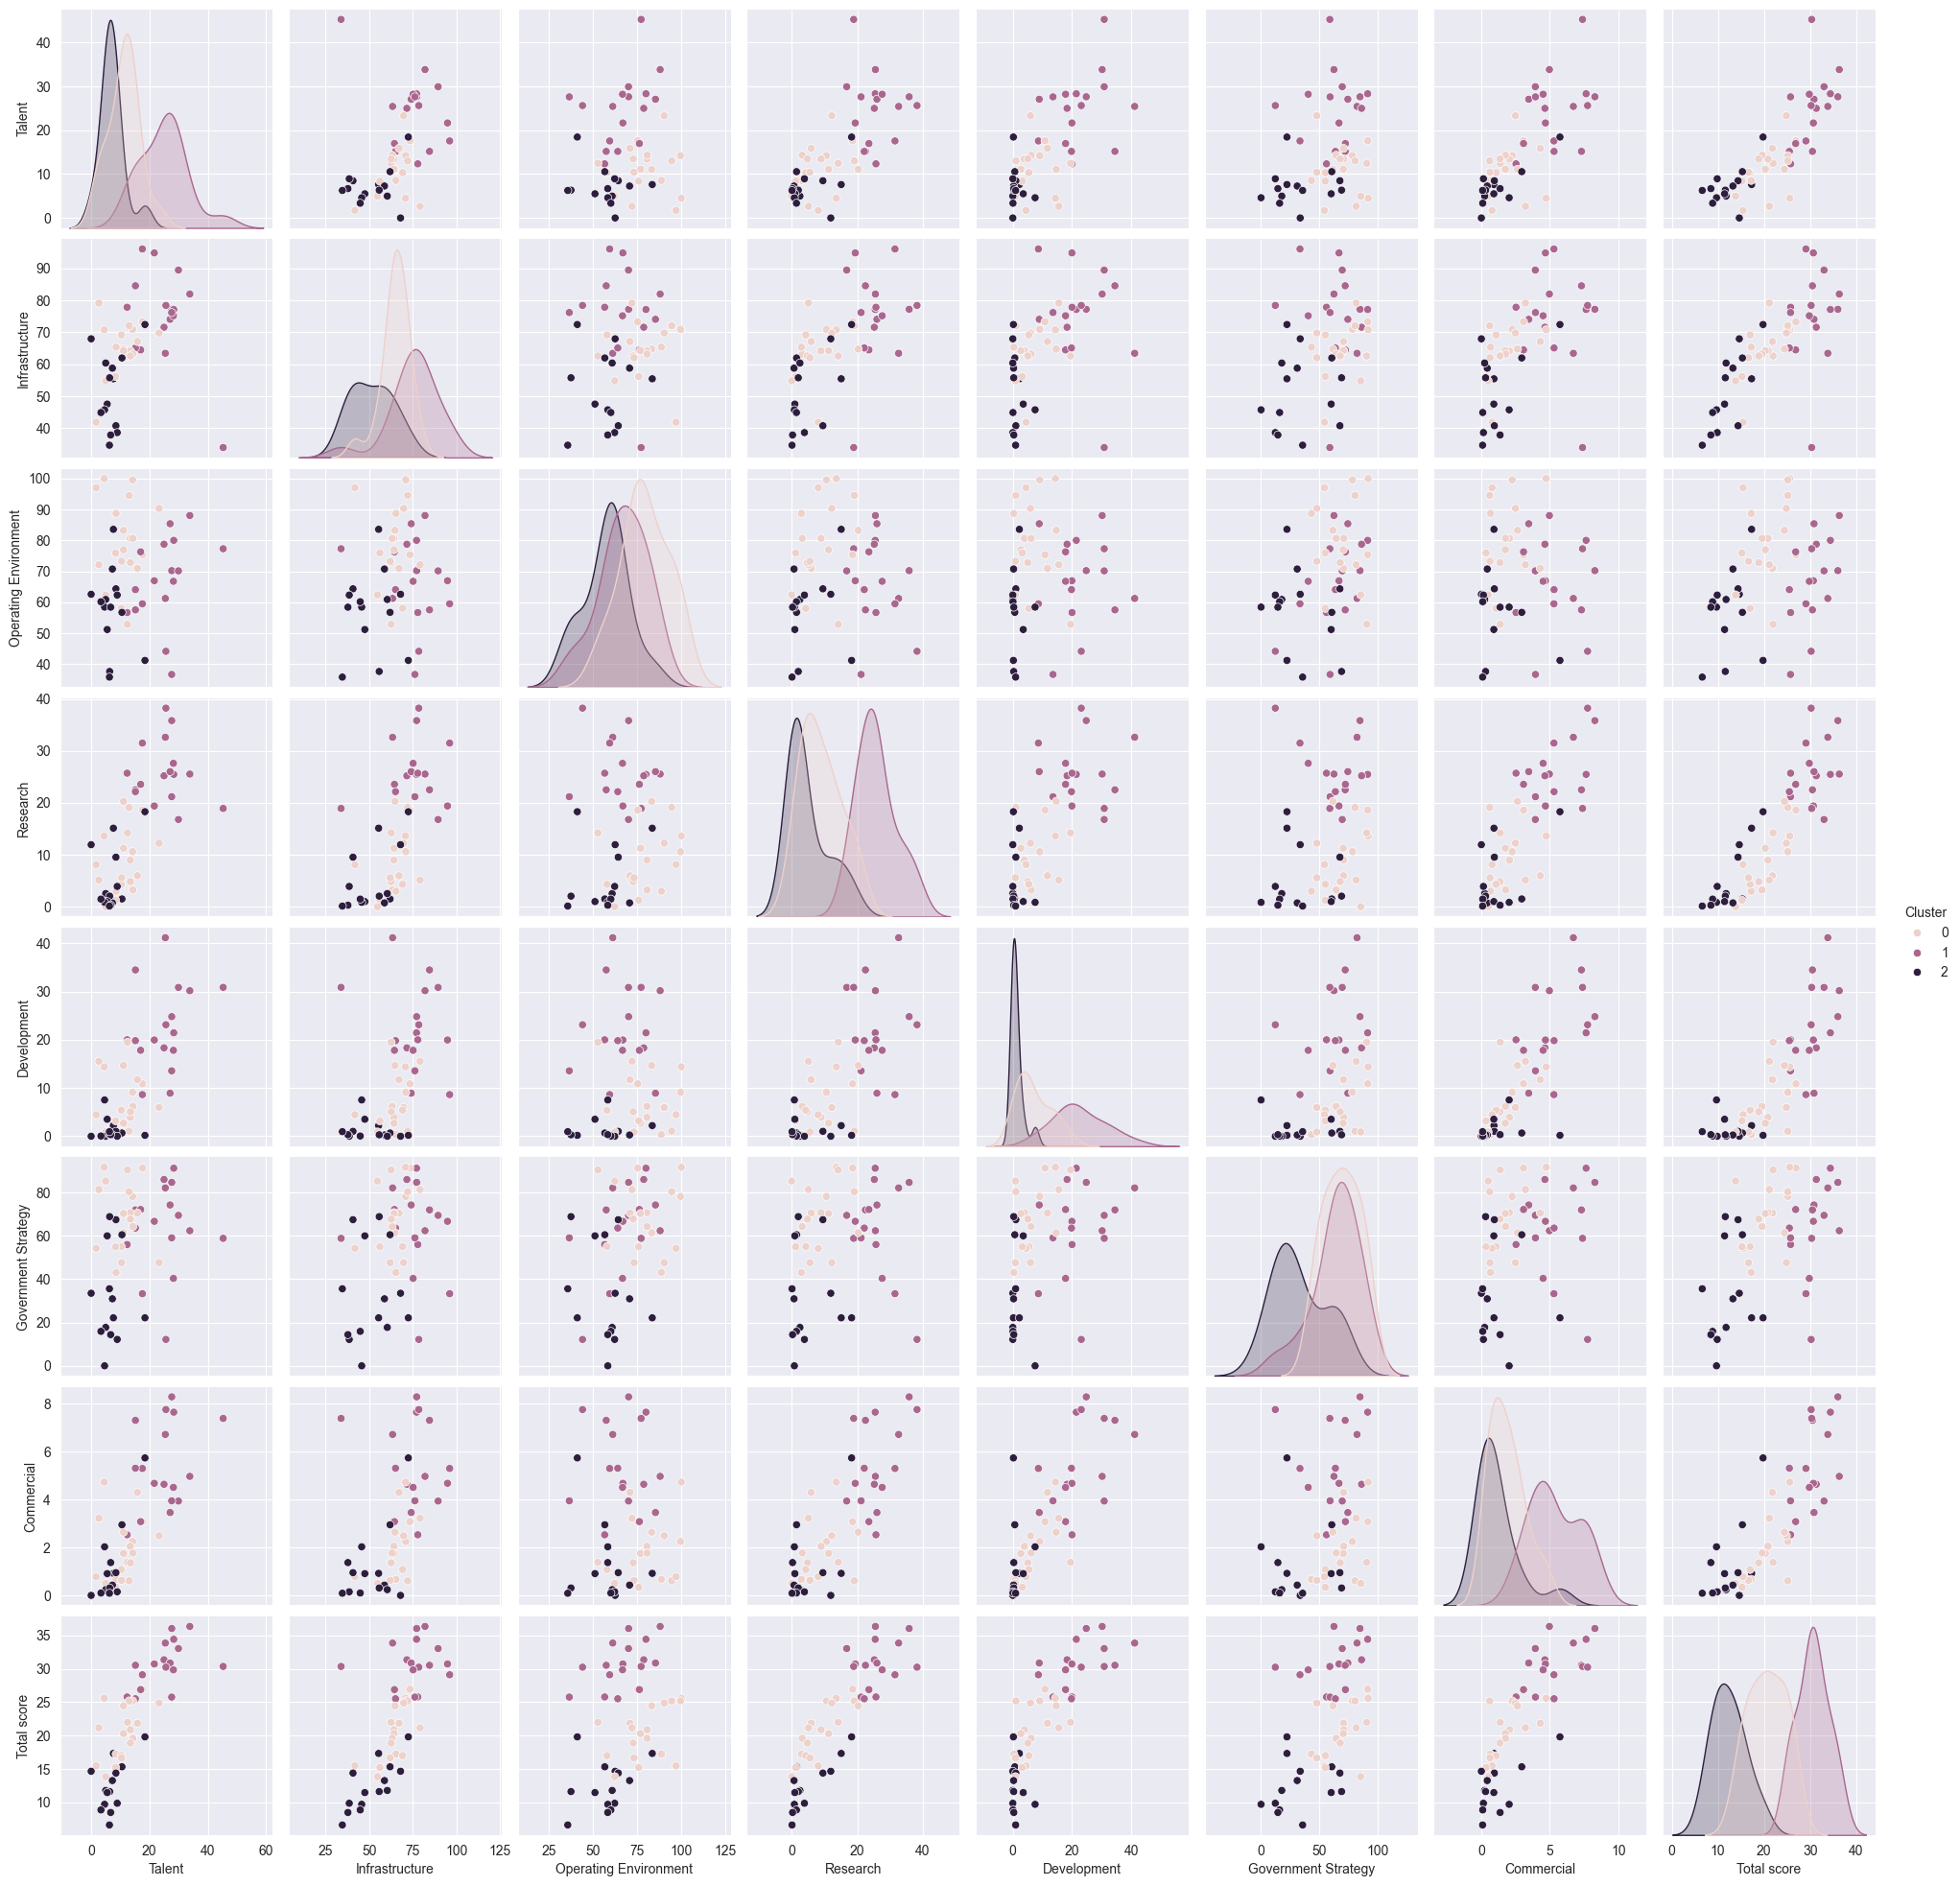

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# График рассеивания для двух переменных
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Talent'], y=data_cleaned['Development'], hue=data_cleaned['Cluster'], palette='Set1')
plt.title('Кластеры по переменным Talent и Development')
plt.xlabel('Talent')
plt.ylabel('Development')
plt.legend(title='Cluster')
plt.show()

# Матрица графиков рассеивания
sns.pairplot(data_cleaned, vars=['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score'], hue='Cluster')
plt.show()


In [11]:
# Средние значения атрибутов по кластерам
cluster_means = data_cleaned.groupby('Cluster')[features].mean()
print("Средние значения по кластерам:\n", cluster_means)

Средние значения по кластерам:
             Talent  Infrastructure  Operating Environment   Research  \
Cluster                                                                
0        11.127368       64.956842              79.233158   8.960000   
1        24.870588       75.395294              67.042353  25.781176   
2         7.079286       51.620714              57.426429   4.945000   

         Development  Government Strategy  Commercial  Total score  
Cluster                                                             
0           7.146316            68.728947    1.875263    20.654211  
1          22.449412            63.765294    5.381765    30.631765  
2           1.215714            32.948571    1.156429    12.373571  
